In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cardio_train.csv', sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.shape

(70000, 13)

In [4]:
data['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [5]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<Axes: xlabel='gender', ylabel='count'>

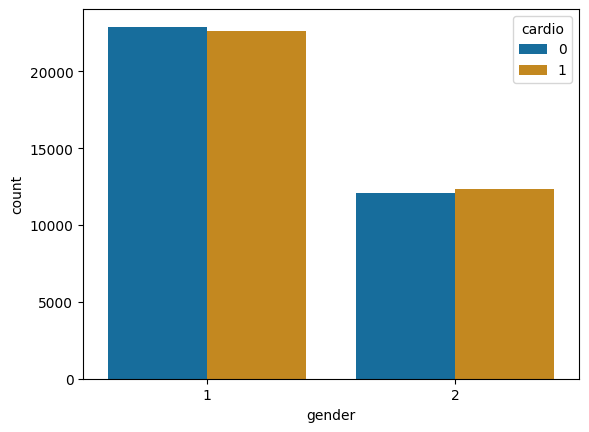

In [6]:
sns.countplot(x='gender', hue='cardio', data=data, palette='colorblind')

In [7]:
data['year'] = (data['age']/365).round(0)
data['year']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: year, Length: 70000, dtype: float64

<Axes: xlabel='year', ylabel='count'>

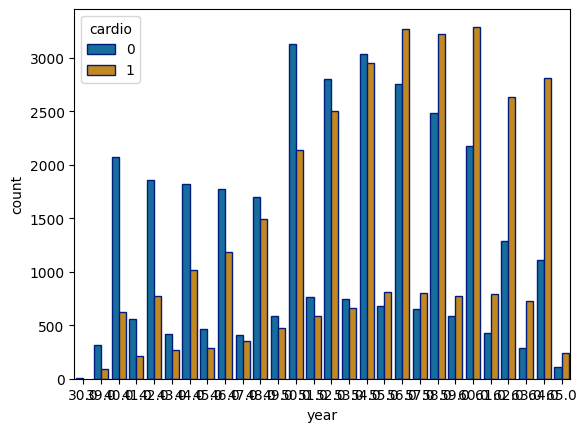

In [8]:
sns.countplot(x='year', hue='cardio', data=data, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1)[0])

In [9]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


<Axes: >

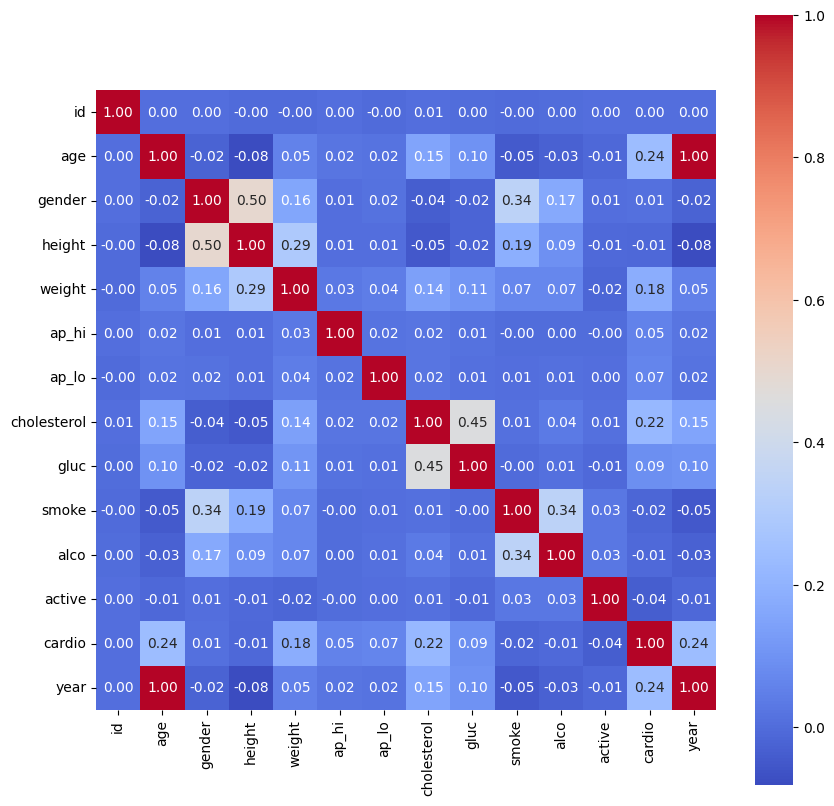

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)

In [11]:
data = data.drop(columns=['id', 'age'], axis=1)
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,1,156,56.0,100,60,1,1,0,0,0,0,48.0


In [12]:
x = data.drop('cardio', axis=1)
x.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year
0,2,168,62.0,110,80,1,1,0,0,1,50.0
1,1,156,85.0,140,90,3,1,0,0,1,55.0
2,1,165,64.0,130,70,3,1,0,0,0,52.0
3,2,169,82.0,150,100,1,1,0,0,1,48.0
4,1,156,56.0,100,60,1,1,0,0,0,48.0


In [13]:
y = data['cardio']
y.shape

(70000,)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state=42)

In [15]:
x_test.shape

(21000, 11)

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [18]:
model.score(x_test, y_test)

0.7063809523809523

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
dec.score(x_test, y_test)

0.6349047619047619

# SVM Algorithm

In [22]:
from sklearn.svm import SVC
svc = SVC()

In [23]:
# svc.fit(x_train, y_train)

In [24]:
# svc.score(x_test, y_test)

In [25]:
# import pickle as pk

# with open('heart_svm', 'wb') as file:
#     pk.dump(svc, file)
    

# Univariate Feature selection

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

In [27]:
fit_feature = SelectKBest(score_func=f_classif)

In [28]:
fit_feature.fit(x,y)

SelectKBest()

In [29]:
score = pd.DataFrame(fit_feature.scores_, columns=['Score'])
score

,Score
0,4.603641
1,8.197397
2,2388.777887
3,208.339524
4,303.629011
5,3599.361137
6,562.772977
7,16.790541
8,3.761355
9,89.091494


In [30]:
name_col = pd.DataFrame(x.columns)

In [31]:
top_feature = pd.concat([name_col, score], axis=1)
top_feature

,0,Score
0,gender,4.603641
1,height,8.197397
2,weight,2388.777887
3,ap_hi,208.339524
4,ap_lo,303.629011
5,cholesterol,3599.361137
6,gluc,562.772977
7,smoke,16.790541
8,alco,3.761355
9,active,89.091494


In [32]:
top_feature.nlargest(8, 'Score')

,0,Score
10,year,4193.661786
5,cholesterol,3599.361137
2,weight,2388.777887
6,gluc,562.772977
4,ap_lo,303.629011
3,ap_hi,208.339524
9,active,89.091494
7,smoke,16.790541


# Feature Importance

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

In [34]:
model = ExtraTreesClassifier()

In [35]:
model.fit(x, y)

ExtraTreesClassifier()

In [36]:
model.feature_importances_

array([0.00589757, 0.22830754, 0.23468738, 0.20032804, 0.12082729,
       0.04781821, 0.01231343, 0.00418605, 0.00471403, 0.00462252,
       0.13629796])

In [38]:
top = pd.Series(model.feature_importances_, index=x.columns)
top

gender         0.005898
height         0.228308
weight         0.234687
ap_hi          0.200328
ap_lo          0.120827
cholesterol    0.047818
gluc           0.012313
smoke          0.004186
alco           0.004714
active         0.004623
year           0.136298
dtype: float64

<Axes: >

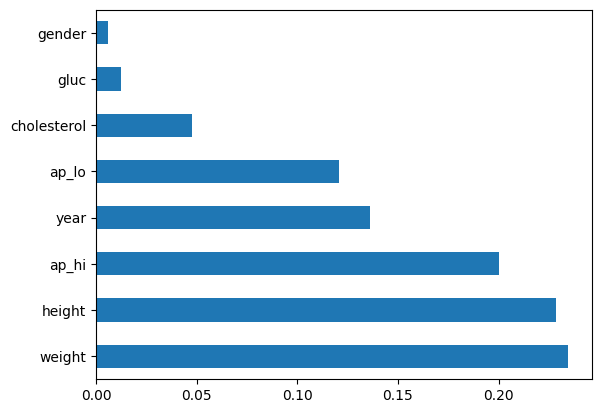

In [44]:
top.nlargest(8).plot(kind='barh')